In [2]:
import numpy as np
from itertools import product
from multiprocessing import Pool, cpu_count
from NEGF_sim_git.src.tight_binding.finite_tight_binding import TightBindingHamiltonian


import scipy.constants as spc

ModuleNotFoundError: No module named 'NEGF_sim_git'

In [3]:
def build_k_path(corner_points, points_per_segment=200):
    """
    corner_points : list of 3-vectors (in Cartesian reciprocal space)
        e.g. [W, Γ, K, …].
    """
    k = []
    for p, q in zip(corner_points[:-1], corner_points[1:]):
        k.extend(self._segment(p, q, points_per_segment))
    k.append(corner_points[-1])          # include the last corner exactly
    return np.array(k)

    
a = 1.0
G  = np.array([0, 0])
K  = np.array([1/2, 1/2])
W  =np.array([-1,0])



In [6]:
TB = TightBindingHamiltonian(1)
ev,evec = TB.getCbmValues(k=np.array([0,0]))
print(ev)
print(evec)

1.7632276035351233
[-1.70290202e-01-4.05271369e-02j  7.08148396e-18+2.70563637e-18j
  5.64894341e-17-1.55062198e-17j -1.82011908e-01-4.33167701e-02j
  8.00120459e-02+1.90419596e-02j  3.53404183e-20-4.41371807e-18j
 -7.42745212e-18-1.31944426e-17j -9.97429505e-19-5.23109322e-18j
 -1.88089600e-01-4.47631919e-02j  4.55262563e-02+1.08347327e-02j
  8.65546974e-02+2.05990364e-02j -3.32355362e-17+2.23126936e-17j
 -1.06038110e-16+2.64872994e-17j -3.97948535e-01-9.47072384e-02j
 -2.66700728e-01-6.34717489e-02j -9.66667169e-18+1.09591841e-17j
  1.12751189e-17+3.56594474e-18j  6.54819285e-19-2.54418213e-19j
  4.13526593e-02+9.84146395e-03j -7.94707342e-02-1.89131335e-02j
  3.01127825e-01+7.16650074e-02j -6.01324087e-17+2.64638411e-17j
 -6.56546423e-17+1.44940252e-17j  6.21932820e-16+2.15753653e-16j
 -2.78996087e-16-9.13917604e-17j -3.94938745e-18-1.18855874e-19j
 -2.55037476e-17-2.99897804e-17j  1.16656728e-18-1.08767601e-18j
  3.45336991e-01+8.21862877e-02j -1.85697939e-01-4.41940036e-02j
  8.65

In [ ]:
effectiveMassData = [None] * 30

for i in range(1, 31):
    effectiveMass = TightBindingHamiltonian(i)
    m1,m2 = effectiveMass.calculateEffectiveMass(resolution = 4)

    effectiveMassData[i - 1] = (m1,m2)


[(np.float64(0.20965304074417082), np.float64(0.20965304074441898)), (np.float64(0.20105019545132807), np.float64(0.20105019545178646)), (np.float64(0.20276956667393892), np.float64(0.20276956667427556)), (np.float64(0.2034886007751251), np.float64(0.20348860077531414)), (np.float64(0.20176882290748832), np.float64(0.20176882290760245)), (np.float64(0.2020232820328833), np.float64(0.20202328203378273)), (np.float64(0.20216143459993974), np.float64(0.20216143460006786)), (np.float64(0.20158493474067332), np.float64(0.20158493474113268)), (np.float64(0.20171654868636282), np.float64(0.2017165487392514)), (np.float64(0.2014589260271808), np.float64(0.20145892606911905)), (np.float64(0.20149511043267432), np.float64(0.20149511043292145)), (np.float64(0.20156952281104193), np.float64(0.2015695228248554)), (np.float64(0.20140034420206024), np.float64(0.2014003442270373)), (np.float64(0.20144544909470166), np.float64(0.20144544909598763)), (np.float64(0.20148464981357175), np.float64(0.201484

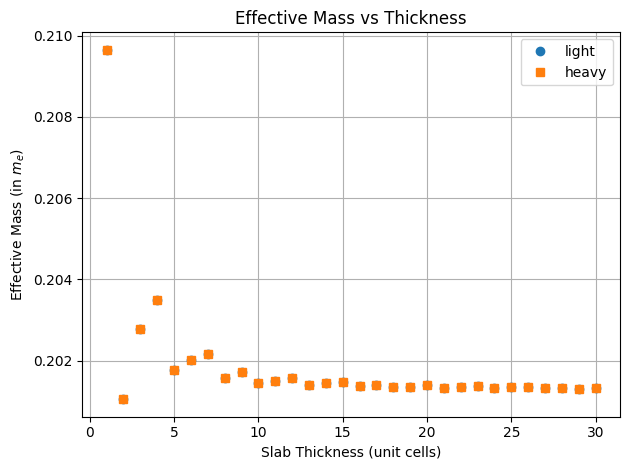

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
print(effectiveMassData)
m1 = np.array([val[0] for val in effectiveMassData])
m2 = np.array([val[-1] for val in effectiveMassData])
thickness = np.array([i for i in range (1,31)])

plt.figure()
plt.plot(thickness, m1, 'o', label='light')
plt.plot(thickness, m2, 's', label='heavy')
plt.xlabel('Slab Thickness (unit cells)')
plt.ylabel('Effective Mass (in $m_e$)')
plt.title('Effective Mass vs Thickness')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
